In [0]:
# Usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, metrics, decomposition
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


In [0]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [6]:
headers = ["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"]

ourData = pd.read_csv(filename, names = headers)
ourData.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#searching missing value

missing_data = ourData.isnull()
missing_data.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Sepal.Length
False    150
Name: Sepal.Length, dtype: int64

Sepal.Width
False    150
Name: Sepal.Width, dtype: int64

Petal.Length
False    150
Name: Petal.Length, dtype: int64

Petal.Width
False    150
Name: Petal.Width, dtype: int64

Species
False    150
Name: Species, dtype: int64



In [9]:
ourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
ourData.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


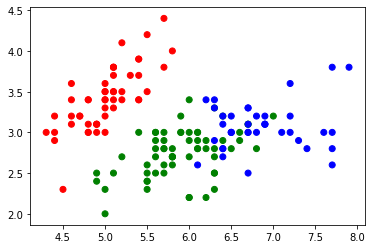

In [11]:
#Applying K-mean Method clustering on Iris Dataset
# species offlowers.

species=ourData.Species.unique()
colors=['g','r','b','c','m','k']
species_dict=dict(zip(species,colors))

ourDataNoLabels = pd . DataFrame ( ourData , columns=[ 'Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'])

kmeans=cluster.KMeans(3).fit(np.array(ourDataNoLabels))
foundLabels= pd.DataFrame(kmeans.labels_, columns=['K-means clusters'])
plt.scatter(ourData['Sepal.Length'], ourData['Sepal.Width'], c=foundLabels['K-means clusters'].apply(lambda x : colors[x])
)
plt.savefig("predicted-labels.png")


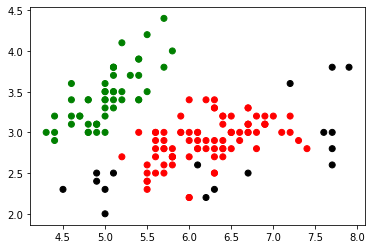

In [12]:
#Applying DBSCAN clustering on Iris Dataset

mat=pd.crosstab(ourData['Species'],foundLabels['K-means clusters'])
dbscan = cluster.DBSCAN().fit(np.array(ourDataNoLabels))
foundLabels['DBSCAN clusters']=pd.DataFrame(dbscan.labels_, columns=['DBSCAN clusters'])
plt.scatter(ourData['Sepal.Length'], ourData['Sepal.Width'], c=foundLabels['DBSCAN clusters'].apply(lambda x : colors[x]))
plt.savefig("predicted-labels2.png")
mat = pd.crosstab(ourData['Species'], foundLabels['DBSCAN clusters'])
#Red - Cluster1
#Green - Cluster 2
#Black - Noise

In [0]:
#Applying Agglomerative clustering on Iris Dataset

ourData.replace('Iris-setosa', 0 , inplace = True)
ourData.replace('Iris-versicolor', 1 , inplace = True)
ourData.replace('Iris-virginica', 2 , inplace = True)
from sklearn import datasets
array = ourData.values
X = array[:,0:4]
iris = datasets.load_iris()
y = iris.target
y_name = ['Setosa', 'Versicolour', 'Virginica']


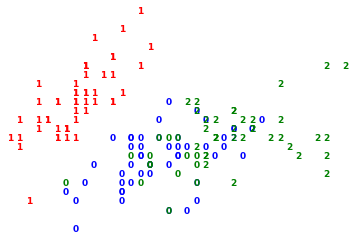

In [14]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X);
#And again, let’s plot the data.

# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)

colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()